In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
%matplotlib inline
%run utils.py
pd.options.display.max_columns = None

In [2]:
# collection et pretraitement de donnees

training_original = pd.read_csv("training.csv")
testing_original = pd.read_csv("testing.csv")

training_quant = training_original.drop(columns=["class"])
testing_quant = testing_original.drop(columns=["class"])

labels_training = training_original["class"]
labels_testing = testing_original["class"]

In [3]:
# choix de donnees 
training_data = training_quant.copy()
testing_data = testing_quant.copy()

# Apprentissage automatique

## Non supervisé (clustering)

### Hierarchical clustering

Type de linkage est:  ward   ARI score est:  0.13041876647849748
Type de linkage est:  complete   ARI score est:  0.10412760712449994
Type de linkage est:  average   ARI score est:  0.10501199749565135
Type de linkage est:  single   ARI score est:  0.001289900602656163


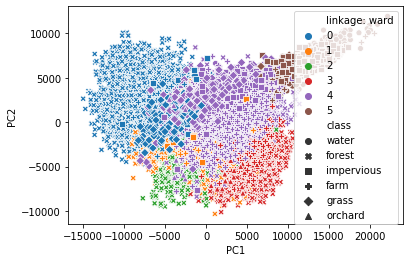

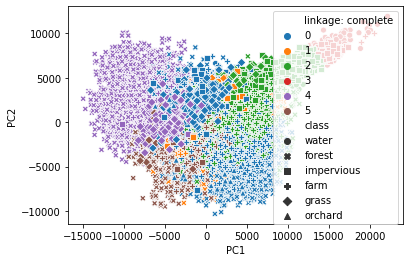

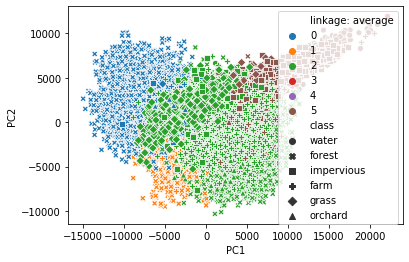

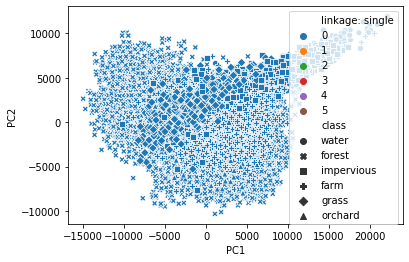

In [59]:
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering
linkage=["ward", "complete", "average","single"]

for i in linkage:
    clustering = AgglomerativeClustering(n_clusters=6,linkage=i).fit(training_data)
    labels_pred = pd.Series(clustering.labels_ , name="linkage: "+i)
    ari= adjusted_rand_score(labels_true=labels_training,labels_pred=labels_pred)
    print("Type de linkage est: ",i,"  ARI score est: ",ari)
    plt.figure()
    scatterplot_pca(data=training_data,hue=labels_pred,style=labels_training)

    on peut dire ce modele n'est pas bonne pour notre jeu de donnees qui possede des inerties intra classe pas assez faible.

### K-means

-32592674011.86865


0.1051105079291626

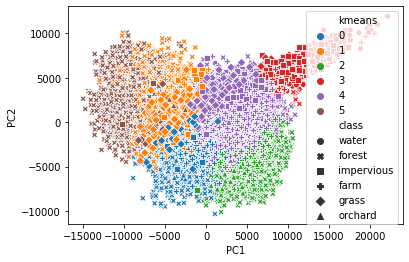

In [67]:
from sklearn.cluster import KMeans

sample_weight={}

kmeans = KMeans(n_clusters=6,n_jobs=-1)
kmeans.fit(training_data,sample_weight=None)
labels_pred = pd.Series(kmeans.labels_,name="kmeans")
print(kmeans.score(testing_data))
scatterplot_pca(data=training_data,hue=labels_pred,style=labels_training)
ari= adjusted_rand_score(labels_true=labels_training,labels_pred=labels_pred)
ari

## Supervisé (classification)

In [8]:
#retirer training set et validation set

# This cross-validation object is a variation of KFold that returns stratified folds.
# The folds are made by preserving the percentage of samples for each class.

from sklearn.model_selection import StratifiedKFold

skf=StratifiedKFold(n_splits=10,shuffle=True)
for train_idx,val_idx in skf.split(training_data,labels_training):
    print('Train: %s | Val: %s' % (train_idx, val_idx))
    print(" ")
    #print("train_x: ",training_data[train_idx])
    #print("train_y: ",labels_training[train_idx])
    #print("val_x:", training_data[val_idx])
    #print("val_y:", labels_training[val_idx])


Train: [    0     2     3 ... 10542 10543 10544] | Val: [    1     8    10 ... 10468 10486 10530]
 
Train: [    0     1     3 ... 10539 10542 10543] | Val: [    2    11    16 ... 10540 10541 10544]
 
Train: [    0     1     2 ... 10542 10543 10544] | Val: [   14    17    19 ... 10501 10508 10538]
 
Train: [    1     2     3 ... 10542 10543 10544] | Val: [    0    13    15 ... 10520 10526 10527]
 
Train: [    0     1     2 ... 10542 10543 10544] | Val: [    4     7    32 ... 10518 10522 10525]
 
Train: [    0     1     2 ... 10541 10543 10544] | Val: [    5    18    22 ... 10534 10539 10542]
 
Train: [    0     1     2 ... 10541 10542 10544] | Val: [   12    25    37 ... 10513 10536 10543]
 
Train: [    0     1     2 ... 10542 10543 10544] | Val: [    9    27    47 ... 10519 10524 10533]
 
Train: [    0     1     2 ... 10542 10543 10544] | Val: [    3    30    38 ... 10529 10531 10532]
 
Train: [    0     1     2 ... 10542 10543 10544] | Val: [    6    45    74 ... 10507 10521 10523]
 


### K nearest neighbors

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier(n_jobs=-1)

hyper_param={
    "n_neighbors":range(3,6),
    "weights": ["uniform","distance"],
    "algorithm" :["ball_tree", "kd_tree", "brute"]   
}

grid_search = GridSearchCV(estimator= knn, param_grid= hyper_param, n_jobs= -1,cv= skf, return_train_score=True)

a=time()
grid_result = grid_search.fit(training_data,labels_training)
b=time()

b-a

298.8924996852875

In [40]:
print("Best: %f using %s" % (grid_result.best_score_,grid_search.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean,param in zip(means,params):
    print("%f  with:   %r" % (mean,param))

Best: 0.968896 using {'algorithm': 'ball_tree', 'n_neighbors': 4, 'weights': 'distance'}
0.967947  with:   {'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'uniform'}
0.968517  with:   {'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'distance'}
0.967284  with:   {'algorithm': 'ball_tree', 'n_neighbors': 4, 'weights': 'uniform'}
0.968896  with:   {'algorithm': 'ball_tree', 'n_neighbors': 4, 'weights': 'distance'}
0.965482  with:   {'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'uniform'}
0.966715  with:   {'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'distance'}
0.967947  with:   {'algorithm': 'kd_tree', 'n_neighbors': 3, 'weights': 'uniform'}
0.968517  with:   {'algorithm': 'kd_tree', 'n_neighbors': 3, 'weights': 'distance'}
0.967284  with:   {'algorithm': 'kd_tree', 'n_neighbors': 4, 'weights': 'uniform'}
0.968896  with:   {'algorithm': 'kd_tree', 'n_neighbors': 4, 'weights': 'distance'}
0.965482  with:   {'algorithm': 'kd_tree', 'n_neighbors': 5, 'we

In [44]:
grid_result.cv_results_

{'mean_fit_time': array([0.07975526, 0.22564425, 0.20076916, 0.25585341, 0.2528255 ,
        0.27694445, 0.43623633, 0.34087191, 0.44459655, 0.43005927,
        0.4867202 , 0.41109343, 0.05637312, 0.04217205, 0.05786088,
        0.06547108, 0.08004987, 0.0697592 ]),
 'std_fit_time': array([0.00971861, 0.13075615, 0.11414207, 0.11281387, 0.08775286,
        0.07048651, 0.13370116, 0.10478246, 0.09794303, 0.16698674,
        0.09627323, 0.128684  , 0.0305179 , 0.0076416 , 0.02864819,
        0.02553714, 0.04624812, 0.02642088]),
 'mean_score_time': array([0.80243738, 2.22628202, 2.29632573, 2.61759968, 2.91193666,
        2.19039552, 2.40943482, 1.85559576, 2.59018269, 2.20367134,
        2.61795952, 2.20573871, 3.11849689, 0.60222743, 0.80414186,
        1.14347343, 1.12396269, 0.73213854]),
 'std_score_time': array([0.18365919, 1.14860539, 1.0976062 , 0.55201203, 0.42888373,
        0.41331998, 0.45550731, 0.26857503, 0.14731305, 0.51106785,
        0.83289537, 0.67917294, 1.95985435, 

In [45]:
knn = KNeighborsClassifier(n_jobs=-1)

hyper_param={
    "n_neighbors":range(2,10),
    "weights": ["distance"],
    "algorithm" :["ball_tree"]   
}

grid_search = GridSearchCV(estimator= knn, param_grid= hyper_param, n_jobs= -1,cv= skf, return_train_score=True)

a=time()
grid_result = grid_search.fit(training_data,labels_training)
b=time()

b-a

85.992604970932

In [46]:
print("Best: %f using %s" % (grid_result.best_score_,grid_search.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean,param in zip(means,params):
    print("%f  with:   %r" % (mean,param))

Best: 0.970319 using {'algorithm': 'ball_tree', 'n_neighbors': 4, 'weights': 'distance'}
0.967947  with:   {'algorithm': 'ball_tree', 'n_neighbors': 2, 'weights': 'distance'}
0.970034  with:   {'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'distance'}
0.970319  with:   {'algorithm': 'ball_tree', 'n_neighbors': 4, 'weights': 'distance'}
0.968233  with:   {'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'distance'}
0.967379  with:   {'algorithm': 'ball_tree', 'n_neighbors': 6, 'weights': 'distance'}
0.967189  with:   {'algorithm': 'ball_tree', 'n_neighbors': 7, 'weights': 'distance'}
0.965767  with:   {'algorithm': 'ball_tree', 'n_neighbors': 8, 'weights': 'distance'}
0.965293  with:   {'algorithm': 'ball_tree', 'n_neighbors': 9, 'weights': 'distance'}


In [48]:
knn_best = KNeighborsClassifier(
    n_neighbors=4, 
    weights= "distance", 
    algorithm="ball_tree",
    n_jobs=-1,
)
knn_best.fit(training_data,labels_training)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
                     weights='distance')

In [56]:
labels_pred=pd.Series(knn_best.predict(testing_data),name="KNN")
knn_best.score(testing_data,labels_testing)

0.6233333333333333

In [64]:
%matplotlib inline

(<matplotlib.axes._subplots.AxesSubplot at 0x1f3800b9e88>,
 PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
     svd_solver='auto', tol=0.0, whiten=False))

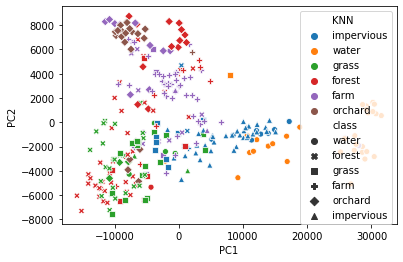

In [65]:
scatterplot_pca(data=testing_data,hue=labels_pred,style=labels_testing)

### Linear and Quadratic Discriminant Analysis

In [99]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda=LinearDiscriminantAnalysis()

hyper_param={
    "solver":["svd","lsqr","eigen"]  
}

grid_search = GridSearchCV(estimator= lda, param_grid= hyper_param, n_jobs= -1,cv= skf)

a=time()
grid_result = grid_search.fit(training_data,labels_training)
b=time()

b-a

2.148120880126953

In [100]:
print("Best: %f using %s" % (grid_result.best_score_,grid_search.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean,param in zip(means,params):
    print("%f  with:   %r" % (mean,param))

Best: 0.881460 using {'solver': 'lsqr'}
0.881365  with:   {'solver': 'svd'}
0.881460  with:   {'solver': 'lsqr'}
0.881460  with:   {'solver': 'eigen'}


In [111]:
lda=LinearDiscriminantAnalysis(solver="lsqr")
lda.fit(training_data,labels_training)
lda.score(testing_data,labels_testing)

0.5933333333333334

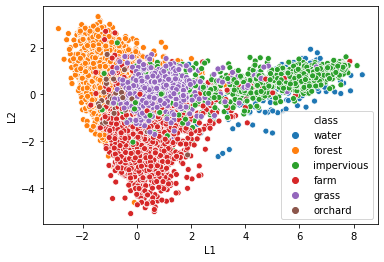

In [110]:
# sns.scatterplot(x=training_lda["L1"],y= training_lda["L2"], hue=labels_training)

In [83]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda=QuadraticDiscriminantAnalysis()
training_qda= qda.fit(training_data,labels_training)

In [84]:
qda.score(testing_data,labels_testing)

0.5533333333333333

In [93]:
np.set_printoptions(suppress=True)
pd.set_option('float_format', lambda x: '%.3f' % x)
pd.DataFrame(qda.predict_proba(testing_data),columns=qda.classes_)

,farm,forest,grass,impervious,orchard,water
0,0.000,0.000,0.001,0.000,0.000,0.999
1,0.000,0.000,0.000,0.262,0.000,0.738
2,0.540,0.000,0.002,0.022,0.000,0.436
3,0.000,0.000,0.000,0.000,0.000,1.000
4,0.000,0.000,0.000,0.027,0.000,0.973
...,...,...,...,...,...,...
295,0.000,0.000,0.000,0.998,0.000,0.002
296,0.000,0.000,0.053,0.000,0.000,0.947
297,0.000,0.000,0.000,0.981,0.000,0.019
298,0.000,0.000,0.010,0.001,0.000,0.990


### Naive Bayes

In [125]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

gnb= GaussianNB()
print(cross_val_score(gnb,training_data,labels_training,cv=skf))
gnb.fit(training_data,labels_training)
gnb.score(testing_data,labels_testing)

[0.83886256 0.84739336 0.82274882 0.8549763  0.86255924 0.85199241
 0.86717268 0.84914611 0.84724858 0.85199241]


0.6866666666666666

In [127]:
gnb= GaussianNB(priors=np.ones(6)/6)
print(cross_val_score(gnb,training_data,labels_training,cv=skf))
gnb.fit(training_data,labels_training)
labels_pred=pd.Series(gnb.predict(testing_data),name="GNB equal proba")
gnb.score(testing_data,labels_testing)


[0.71848341 0.73554502 0.71753555 0.74123223 0.72511848 0.72011385
 0.70967742 0.73719165 0.71631879 0.73814042]


0.7166666666666667

(<matplotlib.axes._subplots.AxesSubplot at 0x1f38aa7d4c8>,
 PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
     svd_solver='auto', tol=0.0, whiten=False))

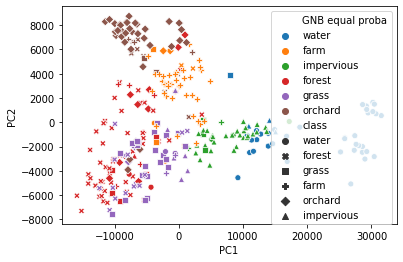

In [129]:
scatterplot_pca(data=testing_data,hue=labels_pred,style=labels_testing)

### Tree

#### decisiontree + adaboost

In [134]:
from sklearn.tree import DecisionTreeClassifier

dtc= DecisionTreeClassifier()
print(cross_val_score(dtc,training_data,labels_training,cv=skf))
dtc.fit(training_data,labels_training)
dtc.score(testing_data,labels_testing)

[0.88909953 0.87867299 0.89004739 0.88246445 0.88625592 0.88235294
 0.87855787 0.88804554 0.90132827 0.87666034]


0.5433333333333333

In [154]:
from sklearn.ensemble import AdaBoostClassifier
dtc= DecisionTreeClassifier()
dtc_ada = AdaBoostClassifier(dtc)
dtc_ada.fit(training_data,labels_training)
dtc_ada.score(testing_data,labels_testing)

0.54

In [139]:
dtc= DecisionTreeClassifier(class_weight="balanced")
print(cross_val_score(dtc,training_data,labels_training,cv=skf))
dtc.fit(training_data,labels_training)
dtc.score(testing_data,labels_testing)

[0.90900474 0.9042654  0.89478673 0.92132701 0.89194313 0.89658444
 0.90037951 0.90037951 0.89658444 0.90037951]


0.53

In [153]:
from sklearn.ensemble import AdaBoostClassifier
dtc= DecisionTreeClassifier(class_weight="balanced")
dtc_ada = AdaBoostClassifier(dtc)
dtc_ada.fit(training_data,labels_training)
dtc_ada.score(testing_data,labels_testing)

0.5566666666666666

In [155]:
from sklearn.ensemble import AdaBoostClassifier
dtc_ada = AdaBoostClassifier()
dtc_ada.fit(training_data,labels_training)
dtc_ada.score(testing_data,labels_testing)

0.5266666666666666

#### random forest

In [170]:
from sklearn.ensemble import RandomForestClassifier

rfc= RandomForestClassifier(oob_score=True)
rfc.fit(training_data,labels_training)
print(rfc.oob_score_)
rfc.score(testing_data,labels_testing)

0.9438596491228071


0.6266666666666667

In [171]:
rfc= RandomForestClassifier(oob_score=True,class_weight="balanced")
rfc.fit(training_data,labels_training)
print(rfc.oob_score_)
rfc.score(testing_data,labels_testing)

0.9492650545282124


0.5966666666666667

In [186]:
rfc= RandomForestClassifier(oob_score=True,class_weight="balanced",n_jobs=-1)
hyper_param={
    "n_estimators":[10,20,50,100] ,
}

grid_search = GridSearchCV(estimator= rfc,param_grid= hyper_param, n_jobs= -1)

a=time()
grid_result = grid_search.fit(training_data,labels_training)
b=time()

b-a

6.012024402618408

In [188]:
print("Best: %f using %s" % (grid_result.best_score_,grid_search.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean,param in zip(means,params):
    print("%f  with:   %r" % (mean,param))

Best: 0.918824 using {'n_estimators': 100}
0.907729  with:   {'n_estimators': 10}
0.911996  with:   {'n_estimators': 20}
0.917781  with:   {'n_estimators': 50}
0.918824  with:   {'n_estimators': 100}


In [199]:
rfc= RandomForestClassifier(n_estimators=100,oob_score=True,class_weight="balanced",n_jobs=-1,max_samples=200)
rfc.fit(training_data,labels_training)
print(rfc.oob_score_)
rfc.score(testing_data,labels_testing)

0.8818397344713134


0.5433333333333333

In [234]:
class_weight =(10000/training_original["class"].value_counts()).to_dict()
rfc= RandomForestClassifier(n_estimators=100,oob_score=True,class_weight=class_weight,n_jobs=-1)
rfc.fit(training_data,labels_training)
print(rfc.oob_score_)
rfc.score(testing_data,labels_testing)

0.9497392128971076


0.5933333333333334

1000 fois repetition de forest avec des donnees aleatoires qui possede le nombre identique de individu dans chaque classe

In [350]:
from random import sample

def n_in_each_class(X,y,n=20,boucle=100):
    id_list=[]
    id=[]
    for j in range(boucle):
        for i in y.unique():
            id= id + sample(y[y==i].index.tolist(),n)
        id_list.append(id)
    return id_list
    
nb_sample_in_each_class = 2
nb_trees_in_each_forest =10
nb_boucle=100

oob_list_rf=[]
pred_proba_rf=[]
id_list= n_in_each_class(training_data,labels_training, nb_sample_in_each_class,nb_boucle)


for i in range(nb_boucle):
    x_train, y_train= training_data.iloc[id_list[i]],labels_training.iloc[id_list[i]]
    rfc= RandomForestClassifier(
        n_estimators=nb_trees_in_each_forest,
        n_jobs=-1
    )
    rfc.fit(x_train,y_train)
    pred_proba_rf.append(rfc.predict_proba(testing_data))
    
pred_proba_rf_np= np.array(pred_proba_rf)
pred=pred_proba_rf_np.sum(axis=0)

result=[]
for i in range(300):
    result.append(rfc.classes_[np.argmax(pred[i,:])])
    
score= np.mean(result==labels_testing)
score    

0.7133333333333334

### Support Vector Machines

In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc= SVC()
hyper_param={
#     "kernel":[
#         "linear","poly",
#         "rbf","sigmod"] ,
#     "decision_function_shape":["ovo","ovr"] 
}

grid_search = GridSearchCV(estimator= svc, param_grid= hyper_param, n_jobs= -1,cv= skf)

a=time()
grid_result = grid_search.fit(training_data,labels_training)
b=time()

print("time:  ",b-a)

print("Best: %f using %s" % (grid_result.best_score_,grid_search.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean,param in zip(means,params):
    print("%f  with:   %r" % (mean,param))
svc.fit(training_data,labels_training)
svc.score(testing_data,labels_testing)

time:   3.395872116088867
Best: 0.951921 using {}
0.951921  with:   {}


0.5566666666666666

In [11]:
svc= SVC()
svc.fit(training_data,labels_training)
svc.score(testing_data,labels_testing)

0.5566666666666666